In [2]:
using DrWatson
@quickactivate "TriangularHubbard"

using DataStructures
using CodecXz
using SQLite
using DBInterface
using DataFrames
using Printf
using LsqFit
using ProgressMeter
using Quadmath
using Statistics
using ProgressMeter
using JSON

using PyPlot
using PyCall
mpl = pyimport("matplotlib")
sns = pyimport("seaborn")

  Activating project at `/data/pn1_1/klee/Projects/TriangularHubbard`


PyObject <module 'seaborn' from '/home/klee/.pyenv/versions/conda_jl/lib/python3.7/site-packages/seaborn/__init__.py'>

In [3]:
PyPlot.rc("axes", labelsize="medium", titlesize="medium")
PyPlot.rc("xtick", labelsize="small")
PyPlot.rc("ytick", labelsize="small")
PyPlot.rc("legend", fontsize="x-small")

cmap = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=true)
markers = ["o", "v", "^", "s", "p", "P", "*", "h", "H", "+", "x", "X", "D", "d", "|", "_"]
;

include("readdata.jl")

preprocess! (generic function with 1 method)

In [4]:
n_sites = 12
shape_str = "(2,-2)x(2,4)"
t = 1.0
U = 20.0

20.0

In [ ]:
sectors_filepath = datadir("curie", shape_str, "sectors.sqlite3")
df = readdata(sectors_filepath)
preprocess!(df)

In [ ]:
names(df)

In [73]:
temperatures = temperatures[0.1 .<= temperatures]

100-element Vector{Float64}:
  0.1
  0.2
  0.3
  0.4
  0.5
  0.6
  0.7
  0.8
  0.9
  1.0
  1.1
  1.2
  1.3
  ⋮
  8.9
  9.0
  9.1
  9.2
  9.3
  9.4
  9.5
  9.6
  9.7
  9.8
  9.9
 10.0

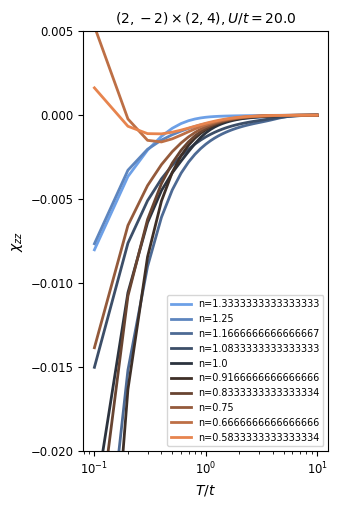

PyObject <matplotlib.legend.Legend object at 0x7f1e53c273d0>

In [79]:
fig = PyPlot.figure(figsize=(7, 5))
fig.subplots_adjust(left=0.18, right=0.95, top=0.94, bottom=0.1)

ax = fig.add_subplot(1,2,1)

for (idx, n) in enumerate(n_list)
    xs = Float64[]
    ys = Float64[]
    sdf = df[df[:, :nup] .+ df[:, :ndn] .== n, :]
    for T in temperatures
        ssdf = sdf[sdf[:, :temperature] .== T, :]
        if isempty(ssdf)
            continue
        end
        corr = sum(ssdf[:, :SzSz2]) / sum(ssdf[:, :partition]) / (n_sites * T)
        Sz_avg = 0
        if !isnan(corr)
            push!(xs, T)
            push!(ys, corr - Sz_avg^2 / (n_sites * T))
        end
    end

    color=cmap((idx-1) / (length(n_list)-1))
    ax.plot(
        xs,
        ys,
        linestyle="-",
        linewidth=2,
        color=color,
        alpha=1.0,
        label="n=$(n/n_sites)",
    )
end
ax.set_xlabel(raw"$T/t$")
ax.set_ylabel(raw"$\chi_{zz}$")
# ax.set_ylim(-0.002, 0.002)
# ax.set_xlim(0, nothing)
# ax.set_xlim(0, 0.5)
# ax.set_ylim()
ax.set_ylim(-0.02, 0.005)
ax.set_xscale("log")
ax.set_title("\$$(replace(shape_str, "x"=>"\\times")), U/t=$(U/t)\$")
ax.legend()


# ax = fig.add_subplot(1,2,2)

# for (idx, n) in enumerate(n_list)
#     xs = Float64[]
#     ys = Float64[]
#     sdf = df[df[:, :nup] .+ df[:, :ndn] .== n, :]
#     for T in temperatures
#         ssdf = sdf[sdf[:, :temperature] .== T, :]
#         if isempty(ssdf)
#             continue
#         end
#         corr = sum(ssdf[:, :SzSz3]) / sum(ssdf[:, :partition]) / (n_sites * T)
#         Sz_avg = 0
#         if !isnan(corr)
#             push!(xs, T)
#             push!(ys, corr - Sz_avg^2 / (n_sites * T))
#         end
#     end

#     color=cmap((idx-1) / (length(n_list)-1))
#     ax.plot(
#         xs,
#         ys,
#         linestyle="-",
#         linewidth=2,
#         color=color,
#         alpha=1.0,
#     )
# end
# ax.set_xlabel(raw"$T/t$")
# ax.set_ylabel(raw"$1/\chi_{zz}$")
# # ax.set_ylim(-0.002, 0.002)
# ax.set_xlim(0, 1)

# ax.set_title("\$$(replace(shape_str, "x"=>"\\times")), U/t=$(U/t)\$")


In [81]:
fig = PyPlot.figure(figsize=(7, 5))
fig.subplots_adjust(left=0.18, right=0.95, top=0.94, bottom=0.1)

ax = fig.add_subplot(1,2,1)

for (idx, n) in enumerate(n_list)
    xs = Float64[]
    ys = Float64[]
    sdf = df[df[:, :nup] .+ df[:, :ndn] .== n, :]
    for T in temperatures
        ssdf = sdf[sdf[:, :temperature] .== T, :]
        if isempty(ssdf)
            continue
        end
        corr = sum(ssdf[:, :energysquared]) / sum(ssdf[:, :partition]) / (n_sites * T)
        Sz_avg = sum(ssdf[:, :energy]) / sum(ssdf[:, :partition])
        if !isnan(corr)
            push!(xs, T)
            push!(ys, corr - Sz_avg^2 / (n_sites * T))
        end
    end

    color=cmap((idx-1) / (length(n_list)-1))
    ax.plot(
        xs,
        ys,
        linestyle="-",
        linewidth=2,
        color=color,
        alpha=1.0,
        label="n=$(n/n_sites)",
    )
end
ax.set_xlabel(raw"$T/t$")
ax.set_ylabel(raw"$\chi_{zz}$")
# ax.set_ylim(-0.002, 0.002)
# ax.set_xlim(0, nothing)
# ax.set_xlim(0, 0.5)
# ax.set_ylim()
ax.set_ylim(-0.02, 0.005)
ax.set_xscale("log")
ax.set_title("\$$(replace(shape_str, "x"=>"\\times")), U/t=$(U/t)\$")
ax.legend()

LoadError: ArgumentError: column name :energysquared not found in the data frame

684956×11 DataFrame
    Row │ nup    ndn    temperature  partition  spin_correlation               ⋯
        │ Int64  Int64  Float64      Float64    String                         ⋯
────────┼───────────────────────────────────────────────────────────────────────
      1 │     0      0         0.01     1.0     [0.0,0.0,0.0,0.0]              ⋯
      2 │     0      0         0.02     1.0     [0.0,0.0,0.0,0.0]
      3 │     0      0         0.03     1.0     [0.0,0.0,0.0,0.0]
      4 │     0      0         0.04     1.0     [0.0,0.0,0.0,0.0]
      5 │     0      0         0.05     1.0     [0.0,0.0,0.0,0.0]              ⋯
      6 │     0      0         0.06     1.0     [0.0,0.0,0.0,0.0]
      7 │     0      0         0.07     1.0     [0.0,0.0,0.0,0.0]
      8 │     0      0         0.08     1.0     [0.0,0.0,0.0,0.0]
      9 │     0      0         0.09     1.0     [0.0,0.0,0.0,0.0]              ⋯
     10 │     0      0         0.1      1.0     [0.0,0.0,0.0,0.0]
     11 │     0      0         0.2      1.0     [0.0,0.0,0.0,0.0]
   ⋮    │   ⋮      ⋮         ⋮           ⋮                      ⋮              ⋱
 684947 │     7      7         9.1     22.2348  [4.021713046933371,-0.37324492
 684948 │     7      7         9.2     23.6015  [4.258550951884088,-0.39509353 ⋯
 684949 │     7      7         9.3     25.027   [4.504859994178967,-0.41780883
 684950 │     7      7         9.4     26.5124  [4.7608139499046125,-0.4414065
 684951 │     7      7         9.5     28.0592  [5.026583477074494,-0.46590192
 684952 │     7      7         9.6     29.6685  [5.302336010385936,-0.49131018 ⋯
 684953 │     7      7         9.7     31.3416  [5.588235662882506,-0.51764608
 684954 │     7      7         9.8     33.0798  [5.884443134442332,-0.54492409
 684955 │     7      7         9.9     34.8842  [6.191115626998357,-0.57315837
 684956 │     7      7        10.0     36.756   [6.508406766383743,-0.60236276 ⋯
                                               7 columns and 684935 rows omitted

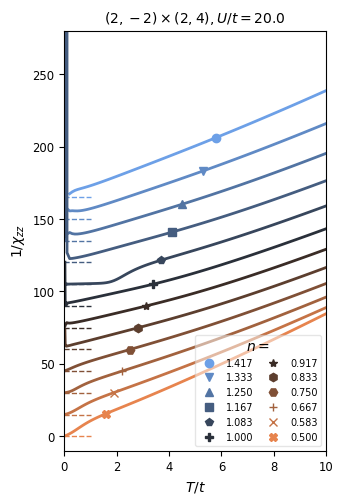

In [13]:
fig = PyPlot.figure(figsize=(3.4, 5))
fig.subplots_adjust(left=0.18, right=0.95, top=0.94, bottom=0.1)
ax = fig.gca()

ymax = 0.0
yoffsets = [15 * (length(n_list) - idx) for idx in 1:length(n_list)]
yoffsets[1:end-1] .+= 0
yoffsets[1:end-2] .+= 0

for (idx, n) in enumerate(n_list)
    xs = Float64[]
    ys = Float64[]
    sdf = df[df[:, :nup] .+ df[:, :ndn] .== n, :]
    for T in temperatures
        ssdf = sdf[sdf[:, :temperature] .== T, :]
        if isempty(ssdf)
            continue
        end
        corr = (sum(ssdf[:, :partition] .* (ssdf[:, :Sz].^2)) / sum(ssdf[:, :partition])) / (n_sites * T)
    #     Sz_avg = (sum(ssdf[:, :partition] .* (ssdf[:, :Sz])) / sum(ssdf[:, :partition]))
        Sz_avg = 0
        if !isnan(corr)
            push!(xs, T)
            push!(ys, corr - Sz_avg^2 / (n_sites * T))
        end
    end
    ys = 1 ./ ys
    yoffset = yoffsets[idx]

    color=cmap((idx-1) / (length(n_list)-1))
    ax.plot(
        xs,
        ys .+ yoffset,
        linestyle="-",
        linewidth=2,
        color=color,
        alpha=1.0,
    )
    let
        xmark = xs[60 - 3*idx]
        ymark = ys[60 - 3*idx] + yoffset
        ax.plot(xmark, ymark, linestyle="None", marker=markers[idx], label=(@sprintf "%.3f" (n/n_sites)),
            color=color,
            alpha=1.0, markersize=6
        )
    end
    ax.plot([0, 1], [yoffset, yoffset], linestyle="--", linewidth=1, color=color, zorder=-3)
    ymax = max(ymax, maximum(ys))
end
ax.set_xlim(0, maximum(temperatures))
ax.set_ylim(-10, 280)

ax.legend(title=raw"$n=$", ncol=2, loc=4, framealpha=0.5, columnspacing=1)
ax.set_xlabel(raw"$T/t$")
ax.set_ylabel(raw"$1/\chi_{zz}$")

ax.set_title("\$$(replace(shape_str, "x"=>"\\times")), U/t=$(U/t)\$")

fig.savefig("triangular-hubbard-invsusc_$(shape_str)_t=$(t)_U=$(U).png", dpi=300)
fig.savefig("triangular-hubbard-invsusc_$(shape_str)_t=$(t)_U=$(U).pdf", dpi=300)


In [15]:
@. model(x, p) = (x - p[2]) / p[1]
temperatures = unique(sort(df[:, :temperature]))
fit_temperatures = [T for T in temperatures if 0.7 <= T <= 5.5]

49-element Vector{Float64}:
 0.7
 0.8
 0.9
 1.0
 1.1
 1.2
 1.3
 1.4
 1.5
 1.6
 1.7
 1.8
 1.9
 ⋮
 4.4
 4.5
 4.6
 4.7
 4.8
 4.9
 5.0
 5.1
 5.2
 5.3
 5.4
 5.5

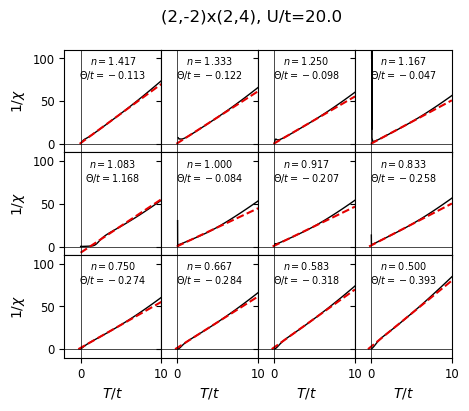

In [16]:
fig = PyPlot.figure(figsize=(5, 4))
axs = fig.subplots(3, 4, sharex=true, sharey=true)
axs = [axs[i,j] for i in 1:3 for j in 1:4]

fig.subplots_adjust(hspace=0, wspace=0)

axs[9].set_xlabel(raw"$T/t$")
axs[10].set_xlabel(raw"$T/t$")
axs[11].set_xlabel(raw"$T/t$")
axs[12].set_xlabel(raw"$T/t$")

axs[1].set_ylabel(raw"$1/\chi$")
axs[5].set_ylabel(raw"$1/\chi$")
axs[9].set_ylabel(raw"$1/\chi$")

fit_params = []
for (idx, n) in enumerate(n_list)
    xs = Float64[]
    ys = Float64[]
    sdf = df[df[:, :nup] .+ df[:, :ndn] .== n, :]
    for T in temperatures
        ssdf = sdf[sdf[:, :temperature] .== T, :]
        if isempty(ssdf)
            continue
        end
        corr = (sum(ssdf[:, :partition] .* (ssdf[:, :Sz].^2)) / sum(ssdf[:, :partition])) / T
        if !isnan(corr)
            push!(xs, T)
            push!(ys, n_sites / corr)
        end
    end

    xs_fit, ys_fit = let i = (0.8 .<= xs .<= 5.5)
        xs[i], ys[i]
    end
    f = curve_fit(model, xs_fit, ys_fit, [1.0, 0.0])
    ax = axs[idx]
    # ax = fig.add_subplot(3, 4, idx, sharex=ax0, sharey=ax0)
    ax.plot(xs, ys, linewidth=1, color="black")
    xfit = [min(f.param[2], 0.0), maximum(xs)] 
    # ax.plot([f.param[2], maximum(xs)], model([f.param[2], maximum(xs)], f.param), linestyle="--", color="xkcd:red")
    ax.plot(xfit, model(xfit, f.param), linestyle="--", color="xkcd:red")

    ax.set_ylim(-10, 110)
    ax.set_xlim(-2, 10)
    ax.text(0.5, 0.95, (@sprintf "\$n=%.3f\$\n\$\\Theta/t=%.3f\$" (n/n_sites) (f.param[2])), ha="center", va="top", transform=ax.transAxes, fontsize="x-small")
#     ax.text(0.5, 0.95, (@sprintf "n=%.3f" (n/n_sites)), ha="center", va="top", transform=ax.transAxes, fontsize="small")
#     ax.set_title("n=$n")
    ax.axhline(0, linewidth=0.5, color="black")
    ax.axvline(0, linewidth=0.5, color="black")
    #ax.set_xscale("log")
    push!(fit_params, [n, f.param[2]] )
end
fit_params = hcat(fit_params...)
fig.suptitle("$(shape_str), U/t=$(U/t)")
fig.savefig("triangular-hubbard-curie-weiss-fits_$(shape_str)_t=$(t)_U=$(U).pdf", dpi=300, bbox_inches="tight")
fig.savefig("triangular-hubbard-curie-weiss-fits_$(shape_str)_t=$(t)_U=$(U).png", dpi=300, bbox_inches="tight")


In [21]:
fit_params = []
# for (idx, n) in enumerate(n_list)
for (idx, n) in enumerate(2:2*n_sites-2)
    xs = Float64[]
    ys = Float64[]
    sdf = df[df[:, :nup] .+ df[:, :ndn] .== n, :]
    for T in temperatures
        ssdf = sdf[sdf[:, :temperature] .== T, :]
        if isempty(ssdf)
            continue
        end
        corr = (sum(ssdf[:, :partition] .* (ssdf[:, :Sz].^2)) / sum(ssdf[:, :partition])) / T
        if !isnan(corr)
            push!(xs, T)
            push!(ys, n_sites / corr)
        end
    end

    xs_fit, ys_fit = let i = (0.8 .<= xs .<= 5.5)
        xs[i], ys[i]
    end
    f = curve_fit(model, xs_fit, ys_fit, [1.0, 0.0])
    push!(fit_params, [n, f.param[2]] )
end
fit_params = hcat(fit_params...)

2×21 Matrix{Float64}:
  2.0       3.0      4.0        5.0       …  21.0          22.0
 -4.88996  -1.2294  -0.750094  -0.523503      0.000669563   0.00458997

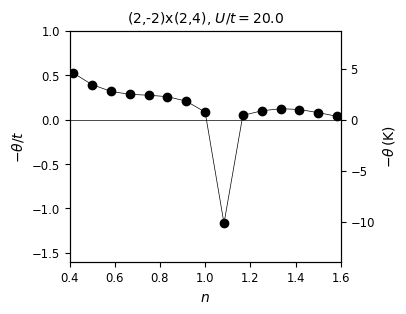

In [27]:
fig = PyPlot.figure(figsize=(3.5, 3))
ax = fig.gca()
ax2 = ax.twinx()
xs = fit_params[1, :] ./ n_sites
ys = -fit_params[2, :]
ax.plot(xs, ys, "o-" , color="black", linewidth=0.5)
ax.axhline(0, linewidth=0.5, color="black", zorder=-10)

ymin, ymax = minimum(ys)-0.1, maximum(ys) + 0.1
ax.set_xlim(0.4, 1.6)
ymin = -1.6
ymax = 1.0
ax.set_ylim(ymin, ymax)
ax2.set_ylim(ymin * 8.7, ymax*8.7)
ax.set_title("$shape_str, \$U/t=$(U/t)\$")
ax.set_xlabel(raw"$n$")
ax.set_ylabel(raw"$-\theta/t$")
ax2.set_ylabel(raw"$-\theta\,\mathrm{(K)}$")
fig.savefig("weisstemp-$(shape_str)_fit_to_jieshan.png", dpi=300, bbox_inches="tight")
fig.savefig("weisstemp-$(shape_str)_fit_to_jieshan.pdf", dpi=300, bbox_inches="tight")


In [ ]:
fig = PyPlot.figure(figsize=(5, 4))
axs = fig.subplots(3, 4, sharex=true, sharey=true)
axs = [axs[i,j] for i in 1:3 for j in 1:4]

fig.subplots_adjust(hspace=0, wspace=0)

axs[9].set_xlabel(raw"$T/t$")
axs[10].set_xlabel(raw"$T/t$")
axs[11].set_xlabel(raw"$T/t$")
axs[12].set_xlabel(raw"$T/t$")

axs[1].set_ylabel(raw"$1/\chi$")
axs[5].set_ylabel(raw"$1/\chi$")
axs[9].set_ylabel(raw"$1/\chi$")

fit_params = []
for (idx, n) in enumerate(n_list)
    xs = Float64[]
    ys = Float64[]
    sdf = df[df[:, :nup] .+ df[:, :ndn] .== n, :]
    for T in temperatures
        ssdf = sdf[sdf[:, :temperature] .== T, :]
        if isempty(ssdf)
            continue
        end
        corr = (sum(ssdf[:, :partition] .* (ssdf[:, :Sz].^2)) / sum(ssdf[:, :partition])) / T
        if !isnan(corr)
            push!(xs, T)
            push!(ys, n_sites / corr)
        end
    end

    xs_fit, ys_fit = let i = (5 .<= xs)
        xs[i], ys[i]
    end
    f = curve_fit(model, xs_fit, ys_fit, [1.0, 0.0])
    ax = axs[idx]
    # ax = fig.add_subplot(3, 4, idx, sharex=ax0, sharey=ax0)
    ax.plot(xs, ys, linewidth=1, color="black")
    xfit = [min(f.param[2], 0.0), maximum(xs)] 
    # ax.plot([f.param[2], maximum(xs)], model([f.param[2], maximum(xs)], f.param), linestyle="--", color="xkcd:red")
    ax.plot(xfit, model(xfit, f.param), linestyle="--", color="xkcd:red")

    ax.set_ylim(-10, 120)
    ax.set_xlim(-2, 10)
    ax.text(0.5, 0.95, (@sprintf "\$n=%.3f\$\n\$\\Theta/t=%.3f\$" (n/n_sites) (f.param[2])), ha="center", va="top", transform=ax.transAxes, fontsize="x-small")
#     ax.text(0.5, 0.95, (@sprintf "n=%.3f" (n/n_sites)), ha="center", va="top", transform=ax.transAxes, fontsize="small")
#     ax.set_title("n=$n")
    ax.axhline(0, linewidth=0.5, color="black")
    ax.axvline(0, linewidth=0.5, color="black")
    #ax.set_xscale("log")
    push!(fit_params, [n, f.param[2]] )
end
fit_params = hcat(fit_params...)
fig.suptitle("$(shape_str), U/t=$(U/t)")
# fig.savefig("triangular-hubbard-curie-weiss-fits_$(shape_str)_t=$(t)_U=$(U).pdf", dpi=300, bbox_inches="tight")
# fig.savefig("triangular-hubbard-curie-weiss-fits_$(shape_str)_t=$(t)_U=$(U).png", dpi=300, bbox_inches="tight")


In [ ]:
fig = PyPlot.figure(figsize=(3.5, 3))
ax = fig.gca()
ax2 = ax.twinx()
xs = fit_params[1, :] ./ n_sites
ys = -fit_params[2, :]
ax.plot(xs, ys, "o-")
ax.axhline(0, linewidth=0.5, color="black", zorder=-10)

ymin, ymax = minimum(ys)-0.1, maximum(ys) + 0.1
ax.set_ylim(ymin, ymax)
ax2.set_ylim(ymin * 8.7, ymax*8.7)
ax.set_title("$shape_str, \$t=1, U=20\$")
ax.set_xlabel(raw"$n$")
ax.set_ylabel(raw"$-\theta/t$")
ax2.set_ylabel(raw"$-\theta\,\mathrm{(K)}$")
# fig.savefig("weiss-$(shape_str)_fit_to_jieshan.png", dpi=300, bbox_inches="tight")
# fig.savefig("weiss-$(shape_str)_fit_to_jieshan.pdf", dpi=300, bbox_inches="tight")


## Plot Charge

In [277]:
# Plot Charge susceptibility
sdf = df
chemical_potentials = -20:0.1:40
Qg = zeros(Float64, (length(temperatures), length(chemical_potentials)))
χg = zeros(Float64, (length(temperatures), length(chemical_potentials)))
Tg = zeros(Float64, (length(temperatures), length(chemical_potentials)))
μg = zeros(Float64, (length(temperatures), length(chemical_potentials)))
@showprogress for (imu, mu) in enumerate(chemical_potentials)
    for (iT, T) in enumerate(temperatures)
        ssdf = sdf[sdf[:, :temperature] .== T, :]
        z_ = Float128.(ssdf[:, :partition])
        q_ = Float128.(ssdf[:, :charge])
        T_ = Float128(T)
        mu_ = Float128(mu)
        emu_ = exp.(mu_ .* q_ / T_)
        qavg_ = sum(q_ .* z_ .* emu_) ./ sum(z_ .* emu_)
        q2avg_ = sum( q_ .* q_ .* z_ .* emu_) ./ sum(z_ .* emu_)
        Qg[iT, imu] = qavg_
        χg[iT, imu] = (q2avg_ - qavg_.^2) ./ (n_sites * T_)
        Tg[iT, imu] = T
        μg[iT, imu] = mu
    end
end

Progress: 100%|█████████████████████████████████████████| Time: 0:02:55


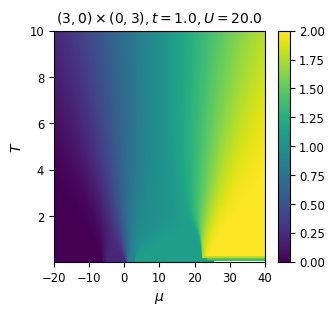

In [333]:
fig = PyPlot.figure(figsize=(3.4, 3))
ax = fig.gca()
# img = ax.imshow(result, extent=[minimum(chemical_potentials), maximum(chemical_potentials), minimum(temperatures), maximum(temperatures)],
# aspect="auto", interpolation="None")
img = ax.pcolor(μg, Tg, Qg ./ n_sites, vmin=0, vmax=2)
ax.set_xlabel(raw"$\mu$")
ax.set_ylabel(raw"$T$")
ax.set_title("\$$(replace(shape_str, "x"=>"\\times")), t=$t, U=$U\$")

fig.colorbar(mappable=img)
# fig.savefig("triangular-hubbard-charge-$(shape_str)_t=$(t)_U=$(U).png", dpi=300)
fig.savefig("triangular-hubbard-charge-$(shape_str)_t=$(t)_U=$(U).pdf", dpi=300, bbox_inches="tight")


In [281]:
χg[isnan.(χg)] .= 0
χg[abs.(χg) .< 1E-8] .= 0
;

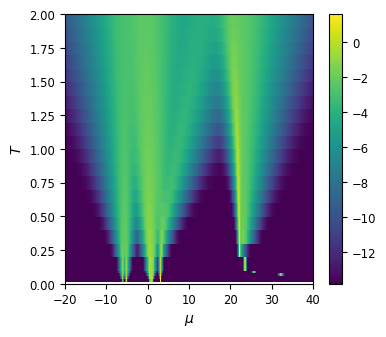

(0.0, 2.0)

In [282]:
fig = PyPlot.figure(figsize=(4, 3.5))
ax = fig.gca()
# img = ax.imshow(result, extent=[minimum(chemical_potentials), maximum(chemical_potentials), minimum(temperatures), maximum(temperatures)],
# aspect="auto", interpolation="None")
img = ax.pcolor(μg, Tg, log.(χg .+ 1E-6))
ax.set_xlabel(raw"$\mu$")
ax.set_ylabel(raw"$T$")
fig.colorbar(mappable=img)
ax.set_ylim(0, 2)

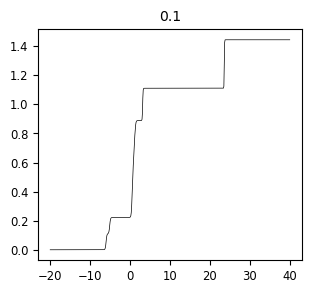

PyObject Text(0.5, 1.0, '0.1')

In [341]:
# for i in 1:size(μg, 1)
fig = PyPlot.figure(figsize=(3.4, 3))
let i = 5
    PyPlot.plot(μg[i, :], Qg[i, :] ./ n_sites, linewidth=0.5, color="black")
    PyPlot.title("$(Tg[i, 1])")
end

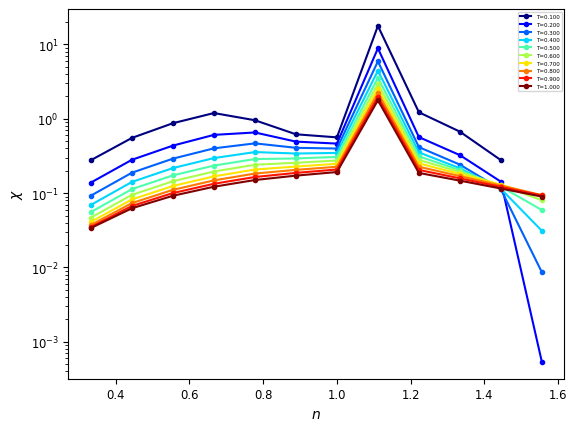